In [25]:
from keras.datasets import mnist
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPool2D, Flatten, Activation
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


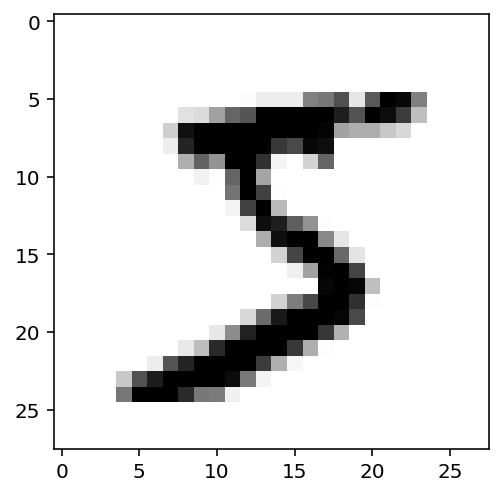

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in range(1):
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.show()


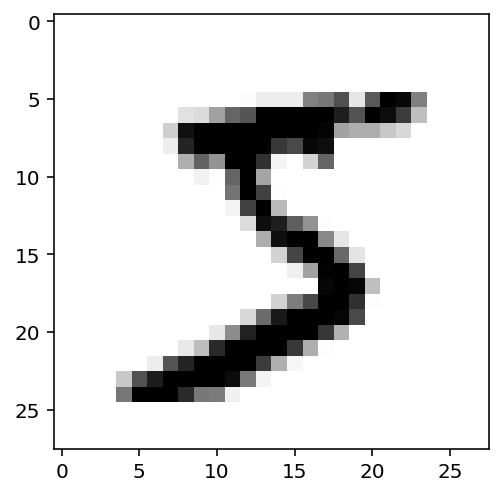

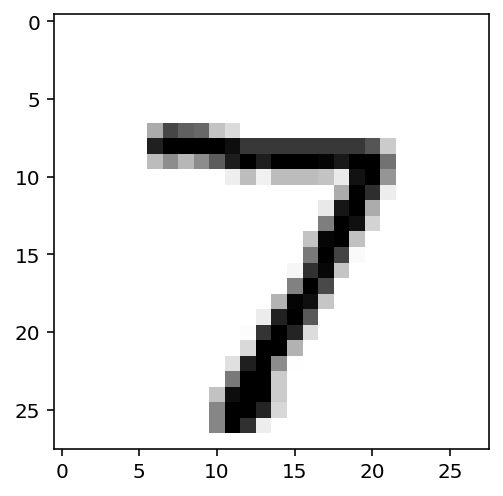

In [46]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
for i in range(1):
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.show()
for i in range(1):
    plt.imshow(X_test[i],cmap=plt.cm.binary)
    plt.show()

In [44]:

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

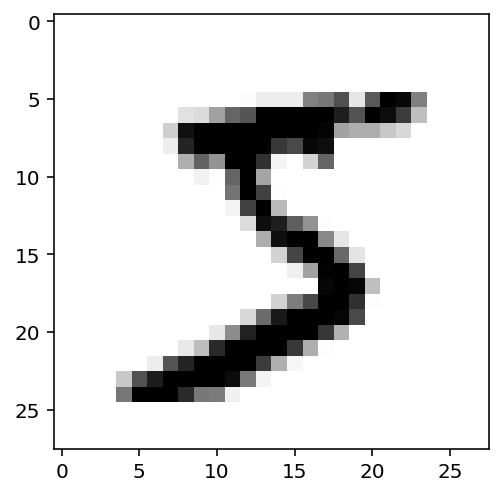

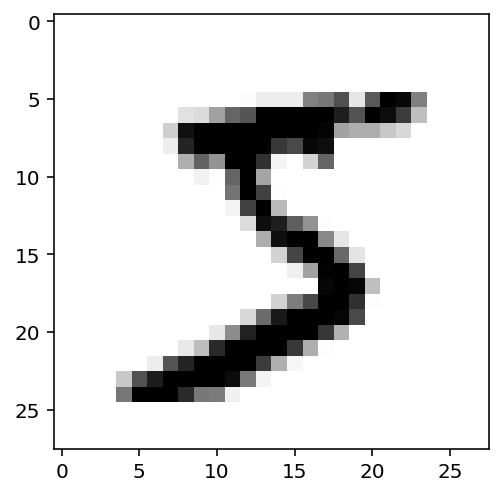

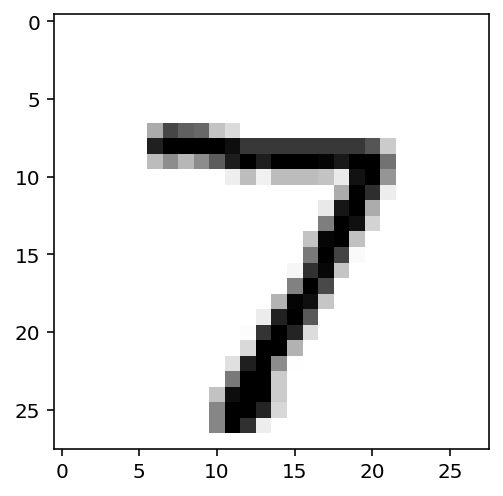

In [47]:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
for i in range(1):
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.show()
X_train =X_train/ 255.0
X_test = X_test/255.0
for i in range(1):
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.show()
for i in range(1):
    plt.imshow(X_test[i],cmap=plt.cm.binary)
    plt.show()

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(5, 5)))
model.add(Activation('relu'))
for i in range(1):
    plt.imshow(X_test[i],cmap=plt.cm.binary)
    plt.show()
for i in range(1):
    plt.imshow(X_test[i],cmap=plt.cm.binary)
    plt.show()
model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

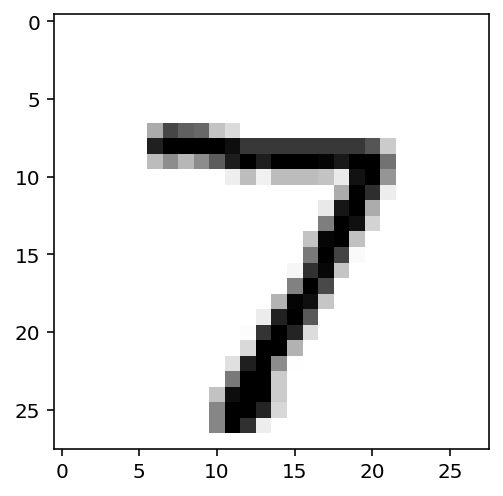

In [49]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
for i in range(1):
    plt.imshow(X_test[i],cmap=plt.cm.binary)
    plt.show()


In [50]:
model.fit(X_train, y_train_cat, batch_size=32, epochs=2, verbose=1, validation_split=0.3)


Epoch 1/2
1313/1313 [==============================] - 15s 11ms/step - loss: 1.4067 - accuracy: 0.5580 - val_loss: 0.3707 - val_accuracy: 0.8901
Epoch 2/2
1313/1313 [==============================] - 15s 11ms/step - loss: 0.3633 - accuracy: 0.8931 - val_loss: 0.3103 - val_accuracy: 0.9087


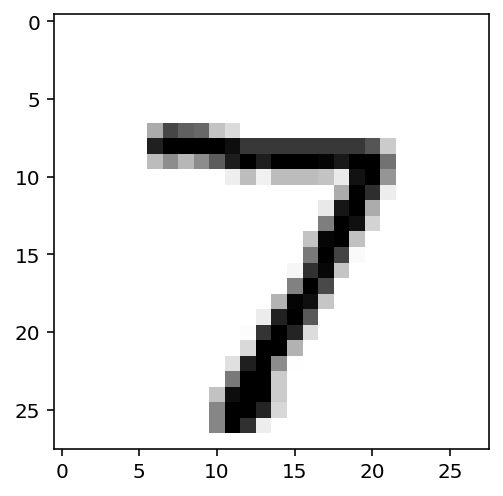

In [51]:
for i in range(1):
    plt.imshow(X_test[i],cmap=plt.cm.binary)
    plt.show()

In [52]:

model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.2993 - accuracy: 0.9119


[0.2993253767490387, 0.911899983882904]

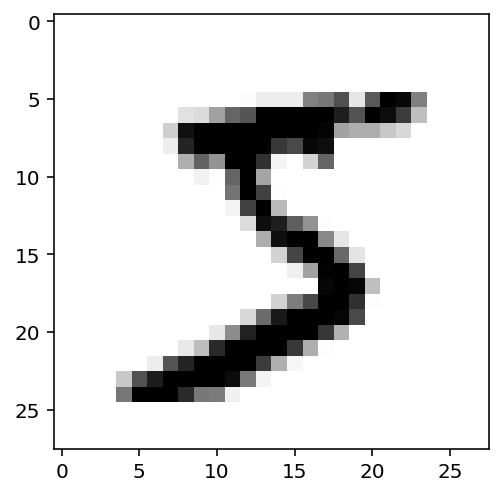

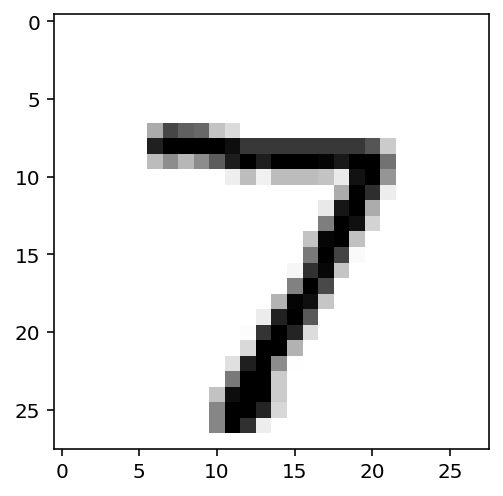

In [53]:
for i in range(1):
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.show()
for i in range(1):
    plt.imshow(X_test[i],cmap=plt.cm.binary)
    plt.show()

In [ ]:

from numpy import argmax
from tkinter import *
import tkinter as tk
import math
from PIL import Image, ImageDraw

In [ ]:

white = (255, 255, 255)
black = (0, 0, 0)
window = Tk()
 
window.title("Handwriting Calculator")
 
window.geometry('500x500')
 
lbl = Label(window, text="Write digits with your mouse in the gray square",font=('Arial Bold',15))
 
lbl.grid(column=3, row=0)
 
canvas_width = 120
canvas_height = 120
image1 = Image.new("RGB", (canvas_width, canvas_height),white)
draw = ImageDraw.Draw(image1)
counter=0
xpoints=[]
ypoints=[]
x2points=[]
y2points=[]
global predictions
predictions = []
number1 = []
digits=0

def paint( event ):
    x1, y1 = ( event.x - 4 ), ( event.y - 4 )
    x2, y2 = ( event.x + 4 ), ( event.y + 4 )
    w.create_oval( x1, y1, x2, y2, fill = 'black' )
    xpoints.append(x1)
    ypoints.append(y1)
    x2points.append(x2) 
    y2points.append(y2)    
    
def imagen ():
    global counter
    global xpoints
    global ypoints    
    global x2points
    global y2points
    counter=counter+1

    image1 = Image.new("RGB", (canvas_width, canvas_height),black)
    draw = ImageDraw.Draw(image1) 

    elementos=len(xpoints)
    
    

    for p in range (elementos):
        x=xpoints[p]
        y=ypoints[p]
        x2=x2points[p]
        y2=y2points[p] 
        draw.ellipse((x,y,x2,y2),'white')
        w.create_oval( x-4, y-4, x2+4, y2+4,outline='gray85', fill = 'gray85' )
    plt.imshow(image1)
    plt.show()

    size=(28,28)
    image1 = image1.resize(size)

    
    image1 = image1.convert('L')
    image1 = np.array(image1)
    image1 = image1.reshape(-1, 28, 28, 1)
   
    image1 = image1.astype('float32')
    image1 /= 255.0
    img = image1
    img = deprocess_image(img)
    imsave('%s_filter_%d.png' % (layer_name, filter_index), img)

    

    
    predictions.append(argmax(model.predict(image1)))
    lbl2 = Label(window, text=predictions[counter-1],font=('Arial Bold',20))
    lbl2.grid(column=3, row=10)
    

    xpoints=[]
    ypoints=[]
    x2points=[]
    y2points=[] 


w = Canvas(window, 
           width=canvas_width, 
           height=canvas_height,bg='gray85')
w.grid(column=3,row=2)
def delete ():
    global counter
    counter = counter-1
    del predictions[counter]
    w1 = Canvas(window, 
           width=200, 
           height=20,bg='gray95')
    w1.grid(column=3,row=10)
    

def equals():
    digitone=''
    digittwo=''
    global digits
    global predictions
    global counter
    digitstotal=len(predictions)
    for x in range(digits):
        digitone=digitone+str(predictions[x])
        predictions[0]=int(digitone)
    for x in range(digits,digitstotal):
        digittwo=digittwo+str(predictions[x])       
        predictions[1]=int(digittwo)
    
   
        
    lbl2 = Label(window, text=answer,font=('Arial Bold',20))
    lbl2.grid(column=3, row=10)
    predictions=[]
    counter=0
def reset():
    global predictions
    global counter
    predictions=[]
    counter=0
    w1 = Canvas(window, 
           width=200, 
           height=20,bg='gray95')
    w1.grid(column=3,row=10)
w1 = Canvas(window, width=200, height=20,bg='gray95')
w1.grid(column=3,row=10)

w.bind( "<B1-Motion>", paint )
button = tk.Button(window, text='Save image', width=25, command=imagen)
button.grid(column=3,row=3)
button6 = tk.Button(window, text='=', width=25, command=equals)
button6.grid(column=3,row=9)

button6 = tk.Button(window, text='Click here if the number is not correct', width=35, command=delete)
button6.grid(column=3,row=12)

button7 = tk.Button(window, text='Reset', width=25, command=reset)
button7.grid(column=3,row=13)

window.mainloop()